In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
train = pd.read_csv('trainDfstats.csv') 
test = pd.read_csv('testDfstats.csv')

In [9]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,OccupationNew_9-11,OccupationNew_12-14,OccupationNew_15-17,OccupationNew_18-20,Id,AvgPurchaseAmount,NumberPurchasesUser,Unqiue_Cat_Count,Two+_Cat_Count,Five+_Cat_Count
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,...,1.0,0.0,0.0,0.0,1000001_P00069042,7778.2,5,8,2,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,...,1.0,0.0,0.0,0.0,1000001_P00248942,7778.2,5,8,2,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,...,1.0,0.0,0.0,0.0,1000001_P00087842,7778.2,5,8,2,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,...,1.0,0.0,0.0,0.0,1000001_P00085442,7778.2,5,8,2,0
4,1000001,P00085942,F,0-17,10,A,2,0,2,4,...,1.0,0.0,0.0,0.0,1000001_P00085942,7778.2,5,8,2,0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49124 entries, 0 to 49123
Data columns (total 80 columns):
User_ID                       49124 non-null int64
Product_ID                    49124 non-null object
Gender                        49124 non-null object
Age                           49124 non-null object
Occupation                    49124 non-null int64
City_Category                 49124 non-null object
Stay_In_Current_City_Years    49124 non-null object
Marital_Status                49124 non-null int64
Product_Category_1            49124 non-null int64
Product_Category_2            49124 non-null int64
Product_Category_3            49124 non-null int64
Purchase_Amount               49124 non-null int64
Female                        49124 non-null float64
Male                          49124 non-null float64
Age_0-17                      49124 non-null float64
Age_18-25                     49124 non-null float64
Age_26-35                     49124 non-null float64
Age_36-45

Inferential Statistics Key Concepts

EDA: EDA, histograms, bee swarm plot, ECDF

Quant EDA: Summary stats, means and medians, percentiles, outliers, and box plots, percentile compared to ECDF, Var and STD, Covar and Pearson Corr, Scatter plots

Probability discrete: Hacker stats, bernoullii trials, binomial distribution, Poisson process and distribution

Probability continuous: Probability density functions, Cumulative density function, Normal distributions, Normal PDF and CDF, Exponential distribution

Parameter estimation by optimization: Linear regression

Bootstrap confidence intervals: Bootstrap replicates, visualizing bootstraps, bootstrap confidence intervals, Pairs bootstrap, plotting bootstrap regressions

Intro hypothesis testing: Formulating and simulating a hypothesis, generating permutation sample, test statistic and p-values, bootstrap hypothesis test, one sample and two sample bootstrap hypothesis test

Hypothesis test examples: A/B testing, test of correlation, hypothesis test on Pearson correlation

EDA: 

    EDA - story telling notebook
    Histograms - story telling notebook
    Bee swarm plot - too much data
    ECDF - ECDF of purchase amount, number of purchases, number of unique categories purchased, Average purchase amount, etc.
   


In [26]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

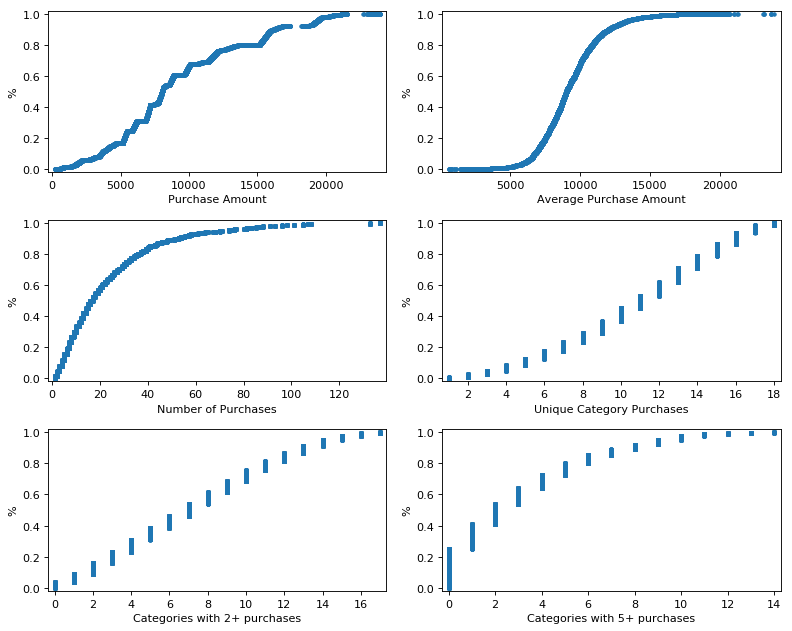

In [33]:
plt.gcf().clear()

colors = ['red', 'blue']
alpha = [.75, .25]
xlabels = []
ylabels = []
titles = []

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='white', edgecolor='k')

# Calculate and plot EDCF for Purchase Amount
x, y = ecdf(train['Purchase_Amount'])
plt.subplot(3,2,1)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.margins(.02)
_ = plt.xlabel('Purchase Amount')
_ = plt.ylabel('%')

# Calculate and plot EDCF for average purchase amount
x, y = ecdf(train['AvgPurchaseAmount'])
plt.subplot(3,2,2)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.margins(.02)
_ = plt.xlabel('Average Purchase Amount')
_ = plt.ylabel('%')

# Calculate and plot EDCF for number of purchases
x, y = ecdf(train['NumberPurchasesUser'])
plt.subplot(3,2,3)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.margins(.02)
_ = plt.xlabel('Number of Purchases')
_ = plt.ylabel('%')

# Calculate and plot EDCF for number of unique category purchases
x, y = ecdf(train['Unqiue_Cat_Count'])
plt.subplot(3,2,4)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.margins(.02)
_ = plt.xlabel('Unique Category Purchases')
_ = plt.ylabel('%')

# Calculate and plot EDCF for categories with 2+ purchases
x, y = ecdf(train['Two+_Cat_Count'])
plt.subplot(3,2,5)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.margins(.02)
_ = plt.xlabel('Categories with 2+ purchases')
_ = plt.ylabel('%')

# Calculate and plot EDCF for categories with 5+ purchases
x, y = ecdf(train['Five+_Cat_Count'])
plt.subplot(3,2,6)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.margins(.02)
_ = plt.xlabel('Categories with 5+ purchases')
_ = plt.ylabel('%')

# Display the plot
plt.tight_layout()
plt.show()

Quant EDA: 

    -Summary stats - story telling notebook
    -means and medians - means taken in story telling.. median of purchase amount, number of purchases, average purchase amount, unique cat purchases, 2+ purchases, 5+ purchases
    -percentiles - story telling notebook... add 2.5%, 10%, etc. for purchase amount, number of purchases.. average purchase amount, unique cat purchases, 2+ purchases, 5+ purchases
    -outliers - how to determine outliers?
    -box plots
    -percentile compared to ECDF
    -Var and STD
    -Covar and Pearson Corr
    -Scatter plots

In [42]:
medianPurchAmt = np.median(train['Purchase_Amount'],)
medianNumPurch = np.median(train['NumberPurchasesUser'])
medianAvgPurchAmt = np.median(train['AvgPurchaseAmount'])
medianUniqueCats = np.median(train['Unqiue_Cat_Count'])
median2cats = np.median(train['Two+_Cat_Count'])
median5cats = np.median(train['Five+_Cat_Count'])

medianList = [medianPurchAmt, medianNumPurch, medianAvgPurchAmt, medianUniqueCats, median2cats, median5cats]
print(medianList)

[8048.0, 17.0, 9008.8333333333339, 11.0, 7.0, 2.0]


In [47]:
percentilePurchAmt = np.percentile(train['Purchase_Amount'], [2.5, 10, 25, 50, 75, 90, 97.5])
percentileNumPurch = np.percentile(train['NumberPurchasesUser'], [2.5, 10, 25, 50, 75, 90, 97.5])
percentileAvgPurchAmt = np.percentile(train['AvgPurchaseAmount'], [2.5, 10, 25, 50, 75, 90, 97.5])
percentileUniqueCats = np.percentile(train['Unqiue_Cat_Count'], [2.5, 10, 25, 50, 75, 90, 97.5])
percentile2cats = np.percentile(train['Two+_Cat_Count'], [2.5, 10, 25, 50, 75, 90, 97.5])
percentile5cats = np.percentile(train['Five+_Cat_Count'], [2.5, 10, 25, 50, 75, 90, 97.5])

percentileList = [percentilePurchAmt, percentileNumPurch, percentileAvgPurchAmt, percentileUniqueCats, percentile2cats, percentile5cats]
for item in percentileList:
    print(item, '\n')

[  1714.    3611.3   5860.    8048.   12035.   16272.   19698. ] 

[  2.   4.   8.  17.  31.  53.  87.] 

[  5572.89473684   6726.91666667   7801.90384615   9008.83333333  10464.3
  12081.94444444  14448.3625    ] 

[  2.   5.   8.  11.  14.  16.  17.] 

[  0.   2.   4.   7.  10.  13.  15.] 

[  0.   0.   0.   2.   5.   8.  10.] 



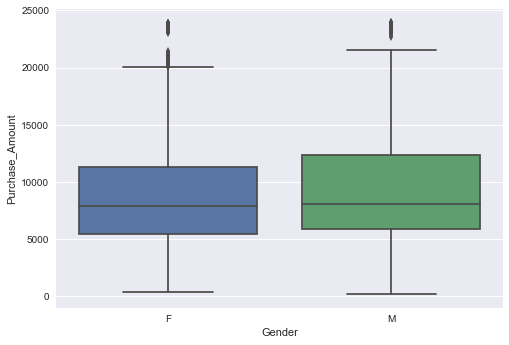

In [49]:
# Create box plot with Seaborn's default settings
import seaborn as sns
_ = sns.boxplot(x='Gender', y='Purchase_Amount', data = train)

# Label the axes
_ = plt.xlabel('Gender')
_ = plt.ylabel('Purchase_Amount')

# Show the plot
plt.show()


In [50]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [58]:
outliers = is_outlier(train['Purchase_Amount'],thresh=3.5)
train[outliers == True]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,OccupationNew_9-11,OccupationNew_12-14,OccupationNew_15-17,OccupationNew_18-20,Id,AvgPurchaseAmount,NumberPurchasesUser,Unqiue_Cat_Count,Two+_Cat_Count,Five+_Cat_Count
147,1000017,P00184242,M,51-55,1,C,0,0,9,15,...,0.0,0.0,0.0,0.0,1000017_P00184242,13438.600000,15,12,7,2
677,1000058,P00117642,M,26-35,2,B,3,0,10,16,...,0.0,0.0,0.0,0.0,1000058_P00117642,11065.645161,31,13,10,5
743,1000062,P00119342,F,36-45,3,A,1,0,10,13,...,0.0,0.0,0.0,0.0,1000062_P00119342,11167.964286,28,13,9,5
891,1000081,P00085342,F,26-35,0,A,1,1,10,13,...,0.0,0.0,0.0,0.0,1000081_P00085342,13656.714286,7,7,4,0
956,1000090,P00119342,M,55+,13,C,1,0,10,13,...,0.0,1.0,0.0,0.0,1000090_P00119342,9249.347826,23,12,7,4
1095,1000107,P00085342,M,46-50,18,C,4+,0,10,13,...,0.0,0.0,0.0,1.0,1000107_P00085342,9343.923077,13,8,4,1
1259,1000126,P00087042,M,18-25,9,B,1,0,10,14,...,1.0,0.0,0.0,0.0,1000126_P00087042,12314.666667,3,5,1,0
1429,1000139,P00159542,F,26-35,20,C,2,0,10,15,...,0.0,0.0,0.0,1.0,1000139_P00159542,12948.714286,21,16,11,3
1987,1000175,P00052842,F,26-35,2,B,1,0,10,15,...,0.0,0.0,0.0,0.0,1000175_P00052842,9280.360000,25,14,10,3
2157,1000190,P00124742,M,26-35,17,A,1,0,10,16,...,0.0,0.0,1.0,0.0,1000190_P00124742,11181.777778,9,10,5,0


In [62]:
varPurchAmt = np.var(train['Purchase_Amount'])
varNumPurch = np.var(train['NumberPurchasesUser'])
varAvgPurchAmt = np.var(train['AvgPurchaseAmount'])
varUniqueCats = np.var(train['Unqiue_Cat_Count'])
var2cats = np.var(train['Two+_Cat_Count'])
var5cats = np.var(train['Five+_Cat_Count'])

varList = [varPurchAmt, varNumPurch, varAvgPurchAmt, varUniqueCats, var2cats, var5cats]

for item in varList:
    print('Variance is: ', item, '\n')

Variance is:  24550331.974376645 

Variance is:  498.76910703279566 

Variance is:  5027996.140807627 

Variance is:  16.56112241880004 

Variance is:  18.012413426560418 

Variance is:  9.347393958799573 



In [64]:
stdPurchAmt = np.std(train['Purchase_Amount'])
stdNumPurch = np.std(train['NumberPurchasesUser'])
stdAvgPurchAmt = np.std(train['AvgPurchaseAmount'])
stdUniqueCats = np.std(train['Unqiue_Cat_Count'])
std2cats = np.std(train['Two+_Cat_Count'])
std5cats = np.std(train['Five+_Cat_Count'])

stdList = [stdPurchAmt, stdNumPurch, stdAvgPurchAmt, stdUniqueCats, std2cats, std5cats]

for item in stdList:
    print('Std is: ', item, '\n')

Std is:  4954.8291569313105 

Std is:  22.33313921133336 

Std is:  2242.319366372156 

Std is:  4.06953589722465 

Std is:  4.244103371333033 

Std is:  3.0573508072839095 



In [65]:
train['TotalPurchAmt'] = train['AvgPurchaseAmount'] * train['NumberPurchasesUser']

In [108]:
plt.plot?

slope = 0.000117155838468
intercept = -0.784780097585


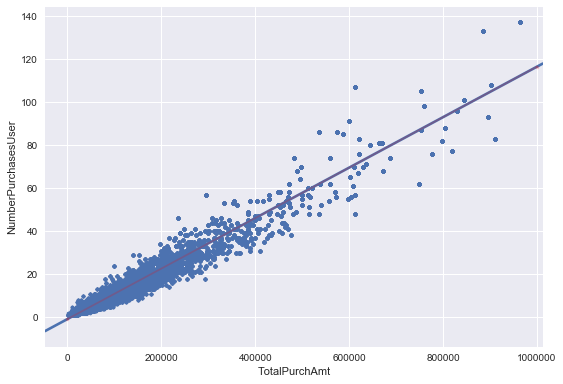

In [114]:
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(train['TotalPurchAmt'], train['NumberPurchasesUser'], deg = 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)

# Make theoretical line to plot
x = np.array([0,1000000])
y = a * x + b

sns.regplot(train['TotalPurchAmt'], train['NumberPurchasesUser'], marker='.')
_ = plt.plot(x, y, color= 'Red', marker='.', alpha = .2)
plt.tight_layout()
plt.show()

In [76]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(train['TotalPurchAmt'], train['NumberPurchasesUser'])
print(covariance_matrix)
cov = covariance_matrix[1,0]
print(cov)

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

r = pearson_r(train['TotalPurchAmt'], train['NumberPurchasesUser'])

# Print the result
print(r)


[[  3.38776266e+10   3.96896176e+06]
 [  3.96896176e+06   4.98779261e+02]]
3968961.75542
0.965531021651


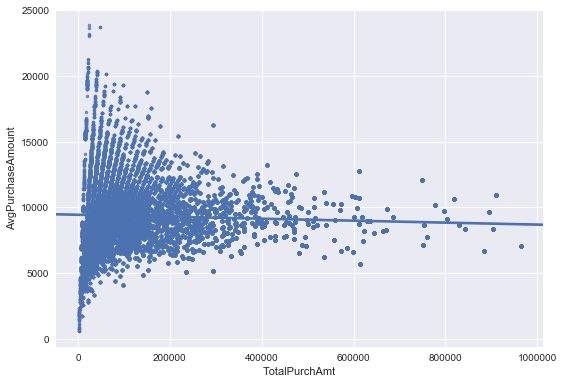

In [67]:
sns.regplot(train['TotalPurchAmt'], train['AvgPurchaseAmount'], marker='.')
plt.tight_layout()
plt.show()

In [77]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(train['TotalPurchAmt'], train['AvgPurchaseAmount'])
print(covariance_matrix)
cov = covariance_matrix[1,0]
print(cov)

r = pearson_r(train['TotalPurchAmt'], train['AvgPurchaseAmount'])

# Print the result
print(r)


[[  3.38776266e+10  -2.53120385e+07]
 [ -2.53120385e+07   5.02809850e+06]]
-25312038.5097
-0.0613294041812


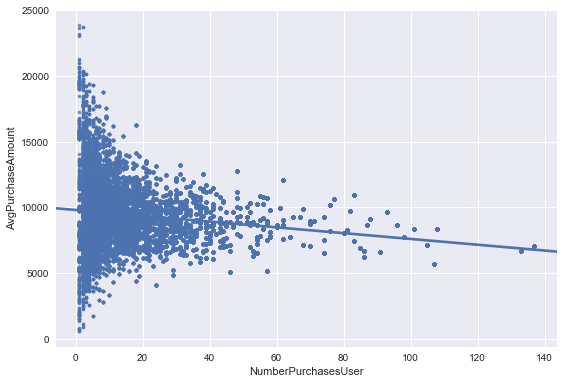

In [69]:
sns.regplot(train['NumberPurchasesUser'], train['AvgPurchaseAmount'], marker='.')
plt.tight_layout()
plt.show()

In [78]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(train['NumberPurchasesUser'],train['AvgPurchaseAmount'])
print(covariance_matrix)
cov = covariance_matrix[1,0]
print(cov)

r = pearson_r(train['NumberPurchasesUser'], train['AvgPurchaseAmount'])

# Print the result
print(r)


[[  4.98779261e+02  -1.09854495e+04]
 [ -1.09854495e+04   5.02809850e+06]]
-10985.4494907
-0.219362178179


Probability discrete: 

    -Hacker stats - does this apply? If so how?
    -bernoullii trials - does not apply
    -binomial distribution - does not apply
    -Poisson process and distribution - does not apply

In [79]:
#PMF - Probability mass function - set of probabilities from discrete outcomes

Probability continuous: 
    
    -Probability density functions - completed above
    -Cumulative density function - completed above
    -Normal distributions - concept / test for below
    -Normal PDF and CDF - concept / test for below
    -Exponential distribution


9286.170181581305


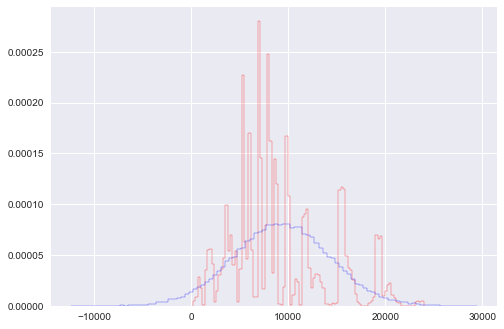

In [95]:
mean = np.mean(train['Purchase_Amount'])
print(mean)
std = np.std(train['Purchase_Amount'])
sample = np.random.normal(mean, std, 50000)
plt.hist(train['Purchase_Amount'],normed=True, histtype='step', bins=100, color='Red')
plt.hist(sample, normed=True, histtype='step', bins = 100, color='Blue')

plt.show()

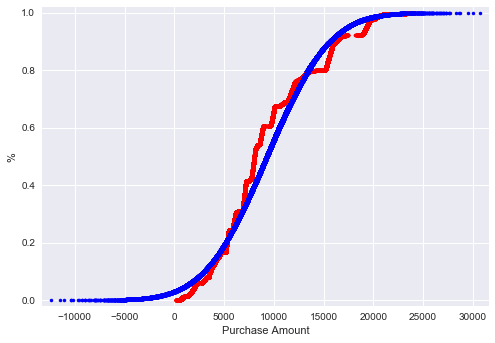

In [117]:
sample = np.random.normal(mean, std, 50000)

x, y = ecdf(train['Purchase_Amount'])
xs, ys = ecdf(sample)

_ = plt.plot(x, y, marker = '.', linestyle = 'none', color='red')
_ = plt.plot(xs, ys, marker='.', linestyle='none', color = 'blue')
_ = plt.margins(.02)
_ = plt.xlabel('Purchase Amount')
_ = plt.ylabel('%')

plt.show()

Parameter estimation by optimization: 
    
    -Linear regression


slope = 0.000117155838468
intercept = -0.784780097585
slope = 0.000117155838468
intercept = -0.784780097585


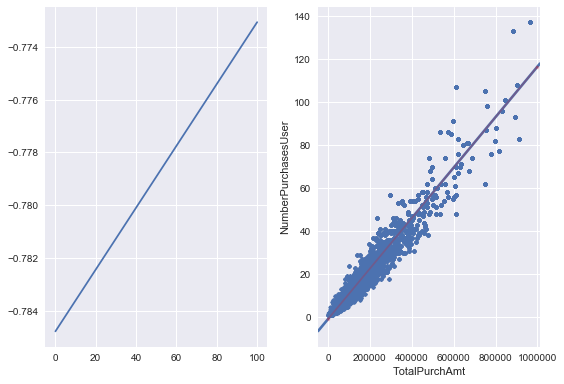

In [121]:
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(train['TotalPurchAmt'], train['NumberPurchasesUser'], deg = 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

plt.subplot(1,2,1)
# Add regression line to your plot
_ = plt.plot(x, y)

plt.subplot(1,2,2)

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(train['TotalPurchAmt'], train['NumberPurchasesUser'], deg = 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)

# Make theoretical line to plot
x = np.array([0,1000000])
y = a * x + b

sns.regplot(train['TotalPurchAmt'], train['NumberPurchasesUser'], marker='.')
_ = plt.plot(x, y, color= 'Red', marker='.', alpha = .2)



# Draw the plot
plt.tight_layout()
plt.show()


Bootstrap confidence intervals: 
    
    -Bootstrap replicates
    -visualizing bootstraps
    -bootstrap confidence intervals
    -Pairs bootstrap
    -plotting bootstrap regressions

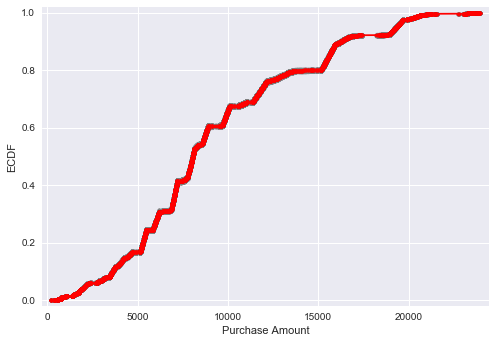

In [126]:
plt.gcf().clear()

for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(train['Purchase_Amount'], size=len(train['Purchase_Amount']))

    # Compute and plot ECDF from bootstrap sample
    xsamp, ysamp = ecdf(bs_sample)
    _ = plt.plot(xsamp, ysamp, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(train['Purchase_Amount'])
_ = plt.plot(x, y, marker='.', color ='red')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Purchase Amount')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [131]:
def bootstrap_replicate_1d(data, func):
    # Generate bootstrap replicate of 1D data
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [132]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

22.355367993
22.4670973452


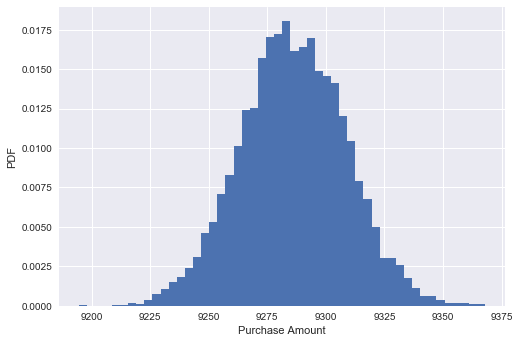

In [133]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(train['Purchase_Amount'], np.mean, 10000)

# Compute and print SEM
sem = np.std(train['Purchase_Amount']) / np.sqrt(len(train['Purchase_Amount']))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Purchase Amount')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [135]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int)

[ 9241.95560368  9330.8302113 ]


In [136]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

[ 0.00011655  0.00011773]


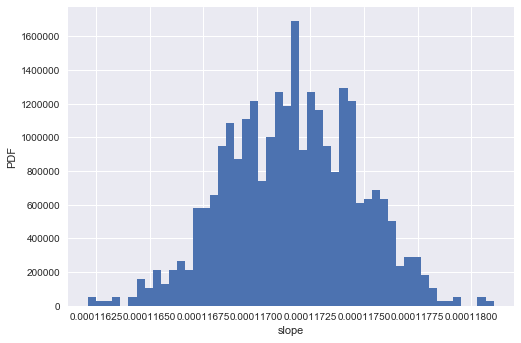

In [137]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(train['TotalPurchAmt'], train['NumberPurchasesUser'], size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps,[2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

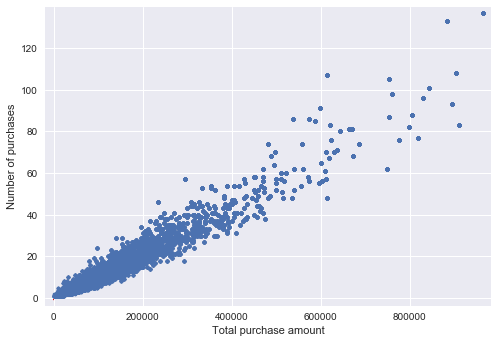

In [139]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(train['TotalPurchAmt'], train['NumberPurchasesUser'], marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('Total purchase amount')
_ = plt.ylabel('Number of purchases')
plt.margins(0.02)
plt.show()

Intro hypothesis testing: 
    
    -Formulating and simulating a hypothesis
    -generating permutation sample
    -test statistic and p-values
    -bootstrap hypothesis test
    -one sample and two sample bootstrap hypothesis test
    

In [140]:
# Null hypothesis: There is no difference in average purchase price 
# between males and females. Males avg purchase price - females avg
# purchase price = 0
# Alternative hypothesis: There is a difference in average purchase price
# between males and females. Males avg purchase price - females avg
# purchase price != 0

In [149]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [157]:
males = train[train['Male']==1]['Purchase_Amount']
females = train[train['Female']==1]['Purchase_Amount']

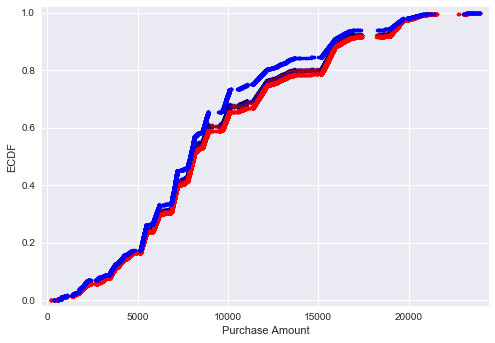

In [158]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(males, females)


    # Compute ECDFs
    x1, y1 = ecdf(perm_sample_1)
    x2, y2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x1, y1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x2, y2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x1, y1 = ecdf(males)
x2, y2 = ecdf(females)
_ = plt.plot(x1, y1, marker='.', linestyle='none', color='red')
_ = plt.plot(x2, y2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('Purchase Amount')
_ = plt.ylabel('ECDF')
plt.show()

In [168]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [177]:
print(empirical_diff_means)
print(perm_replicates)
print (np.sum(perm_replicates > empirical_diff_means))

728.3634263879449
[-42.25172779 -56.31797666  52.23364229 ...,  29.93997524  61.46950666
  27.66684016]
0


In [174]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(males, females)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(males, females,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


p-value = 0.0


The probability of observing a sample mean difference equal to or greater than the empirical mean difference is 0 which is lower than our significance level of .05 thus we reject the Null Hypothesis and accept with 95% confidence that the average purchase price of males is not equal to the average purchase price of females. 

Hypothesis test examples: 
    
    -A/B testing
    -test of correlation
    -hypothesis test on Pearson correlation